In [1]:
from __future__ import print_function
 
import logging
import os.path
import sys
import time
 
from gensim.corpora import WikiCorpus

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

In [3]:
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

2019-03-24 20:51:16,443: INFO: running C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py -f C:\Users\Louis\AppData\Roaming\jupyter\runtime\kernel-b3e0fb0a-f9e3-4e26-98f7-9c0df597c8ae.json


In [15]:
namaFileInput = "idwiki-latest-pages-articles.xml.bz2"
namaFileOutput = "wiki.id.case.text"

In [16]:
space = " "
i = 0

In [17]:
output = open(namaFileOutput, 'w')

In [18]:
# lower=False: huruf kecil dan besar dibedakan
wiki = WikiCorpus(namaFileInput, lemmatize=False, dictionary={}, lower=False)

2019-03-24 14:55:40,114: INFO: adding document #0 to Dictionary(0 unique tokens: [])
2019-03-24 14:56:04,597: INFO: adding document #10000 to Dictionary(315888 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:56:22,530: INFO: adding document #20000 to Dictionary(439445 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:56:39,972: INFO: adding document #30000 to Dictionary(538380 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:56:54,921: INFO: adding document #40000 to Dictionary(619842 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:57:10,903: INFO: adding document #50000 to Dictionary(715092 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:57:25,397: INFO: adding document #60000 to Dictionary(791782 unique tokens: ['AT', 'Abalone', 'Ada', 'Adenina', 'Akibatnya']...)
2019-03-24 14:57:40,825: INFO: adding document #70000 to 

In [19]:
print('Save the checkpoint now....')
time.sleep(30)
print('start loop......')
for text in wiki.get_texts():
    concated = ' '.join(text) + '\n'
    concated = concated.encode('utf-8')
    output.write(str(concated))
#     output.write(str.encode(text))
    i = i + 1
    if i % 10000 == 0:
        logger.info("Saved " + str(i) + " articles")
 
output.close()
logger.info("Finished Saved " + str(i) + " articles")

Save the checkpoint now....
start loop......


2019-03-24 15:04:42,638: INFO: Saved 10000 articles
2019-03-24 15:04:58,613: INFO: Saved 20000 articles
2019-03-24 15:05:14,404: INFO: Saved 30000 articles
2019-03-24 15:05:27,691: INFO: Saved 40000 articles
2019-03-24 15:05:41,608: INFO: Saved 50000 articles
2019-03-24 15:05:53,799: INFO: Saved 60000 articles
2019-03-24 15:06:07,310: INFO: Saved 70000 articles
2019-03-24 15:06:26,031: INFO: Saved 80000 articles
2019-03-24 15:06:43,364: INFO: Saved 90000 articles
2019-03-24 15:06:59,221: INFO: Saved 100000 articles
2019-03-24 15:07:13,380: INFO: Saved 110000 articles
2019-03-24 15:07:29,814: INFO: Saved 120000 articles
2019-03-24 15:07:44,481: INFO: Saved 130000 articles
2019-03-24 15:07:58,796: INFO: Saved 140000 articles
2019-03-24 15:08:04,445: INFO: Saved 150000 articles
2019-03-24 15:08:07,653: INFO: Saved 160000 articles
2019-03-24 15:08:11,081: INFO: Saved 170000 articles
2019-03-24 15:08:13,949: INFO: Saved 180000 articles
2019-03-24 15:08:16,433: INFO: Saved 190000 articles
20

In [4]:
import multiprocessing

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [74]:
namaFileInput = "wiki.id.case.text"
namaFileOutput = "w2vec_win2_dim300"

In [75]:
cores = multiprocessing.cpu_count()

In [76]:
model = Word2Vec(LineSentence(namaFileInput), size=300, 
                 window=2, 
                 min_count=20, 
                 workers=cores-1, 
                 sample=6e-5, 
                 alpha=0.03, 
                 min_alpha=0.0007, 
                 negative=20)

2019-03-24 17:45:30,757: INFO: collecting all words and their counts
2019-03-24 17:45:40,256: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-24 17:46:01,921: INFO: collected 1983141 word types from a corpus of 95063972 raw words and 9507 sentences
2019-03-24 17:46:01,923: INFO: Loading a fresh vocabulary
2019-03-24 17:46:03,089: INFO: min_count=20 retains 150595 unique words (7% of original 1983141, drops 1832546)
2019-03-24 17:46:03,090: INFO: min_count=20 leaves 90525339 word corpus (95% of original 95063972, drops 4538633)
2019-03-24 17:46:03,691: INFO: deleting the raw counts dictionary of 1983141 items
2019-03-24 17:46:06,839: INFO: sample=6e-05 downsamples 837 most-common words
2019-03-24 17:46:06,840: INFO: downsampling leaves estimated 60222210 word corpus (66.5% of prior 90525339)
2019-03-24 17:46:07,428: INFO: estimated required memory for 150595 words and 300 dimensions: 436725500 bytes
2019-03-24 17:46:07,428: INFO: resetting layer weights
2

2019-03-24 17:47:24,679: INFO: EPOCH 1 - PROGRESS: at 39.04% examples, 323954 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:47:25,708: INFO: EPOCH 1 - PROGRESS: at 39.65% examples, 324515 words/s, in_qsize 12, out_qsize 1
2019-03-24 17:47:26,711: INFO: EPOCH 1 - PROGRESS: at 40.29% examples, 325374 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:47:27,716: INFO: EPOCH 1 - PROGRESS: at 40.91% examples, 326073 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:47:28,729: INFO: EPOCH 1 - PROGRESS: at 41.56% examples, 326878 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:47:29,764: INFO: EPOCH 1 - PROGRESS: at 42.20% examples, 327617 words/s, in_qsize 12, out_qsize 1
2019-03-24 17:47:30,771: INFO: EPOCH 1 - PROGRESS: at 42.83% examples, 328434 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:47:31,791: INFO: EPOCH 1 - PROGRESS: at 43.44% examples, 329023 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:47:32,829: INFO: EPOCH 1 - PROGRESS: at 44.10% examples, 329838 words/s, in_qsize 14, out_

2019-03-24 17:48:39,625: INFO: EPOCH 1 - PROGRESS: at 89.20% examples, 359110 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:48:40,626: INFO: EPOCH 1 - PROGRESS: at 89.84% examples, 359341 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:48:41,635: INFO: EPOCH 1 - PROGRESS: at 90.48% examples, 359539 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:48:42,650: INFO: EPOCH 1 - PROGRESS: at 91.11% examples, 359601 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:48:43,658: INFO: EPOCH 1 - PROGRESS: at 91.71% examples, 359548 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:48:44,660: INFO: EPOCH 1 - PROGRESS: at 92.32% examples, 359599 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:48:45,675: INFO: EPOCH 1 - PROGRESS: at 92.92% examples, 359693 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:48:46,679: INFO: EPOCH 1 - PROGRESS: at 93.53% examples, 359752 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:48:47,688: INFO: EPOCH 1 - PROGRESS: at 94.17% examples, 360002 words/s, in_qsize 13, out_

2019-03-24 17:49:57,423: INFO: EPOCH 2 - PROGRESS: at 30.90% examples, 323039 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:49:58,452: INFO: EPOCH 2 - PROGRESS: at 31.56% examples, 324162 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:49:59,485: INFO: EPOCH 2 - PROGRESS: at 32.23% examples, 325341 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:50:00,508: INFO: EPOCH 2 - PROGRESS: at 32.88% examples, 326623 words/s, in_qsize 14, out_qsize 1
2019-03-24 17:50:01,527: INFO: EPOCH 2 - PROGRESS: at 33.50% examples, 327571 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:50:02,537: INFO: EPOCH 2 - PROGRESS: at 34.12% examples, 328545 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:50:03,552: INFO: EPOCH 2 - PROGRESS: at 34.72% examples, 329162 words/s, in_qsize 12, out_qsize 1
2019-03-24 17:50:04,564: INFO: EPOCH 2 - PROGRESS: at 35.32% examples, 329788 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:50:05,571: INFO: EPOCH 2 - PROGRESS: at 35.93% examples, 330463 words/s, in_qsize 13, out_

2019-03-24 17:51:12,517: INFO: EPOCH 2 - PROGRESS: at 81.58% examples, 364910 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:51:13,539: INFO: EPOCH 2 - PROGRESS: at 82.22% examples, 365106 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:51:14,552: INFO: EPOCH 2 - PROGRESS: at 82.87% examples, 365328 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:51:15,582: INFO: EPOCH 2 - PROGRESS: at 83.55% examples, 365587 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:51:16,588: INFO: EPOCH 2 - PROGRESS: at 84.19% examples, 365739 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:51:17,608: INFO: EPOCH 2 - PROGRESS: at 84.80% examples, 365791 words/s, in_qsize 14, out_qsize 1
2019-03-24 17:51:18,651: INFO: EPOCH 2 - PROGRESS: at 85.44% examples, 365938 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:51:19,686: INFO: EPOCH 2 - PROGRESS: at 86.06% examples, 365988 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:51:20,704: INFO: EPOCH 2 - PROGRESS: at 86.70% examples, 366162 words/s, in_qsize 14, out_

2019-03-24 17:52:30,198: INFO: EPOCH 3 - PROGRESS: at 23.44% examples, 308245 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:52:31,210: INFO: EPOCH 3 - PROGRESS: at 24.08% examples, 310065 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:52:32,224: INFO: EPOCH 3 - PROGRESS: at 24.73% examples, 311859 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:52:33,252: INFO: EPOCH 3 - PROGRESS: at 25.38% examples, 313547 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:52:34,253: INFO: EPOCH 3 - PROGRESS: at 26.03% examples, 315339 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:52:35,261: INFO: EPOCH 3 - PROGRESS: at 26.68% examples, 316782 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:52:36,267: INFO: EPOCH 3 - PROGRESS: at 27.34% examples, 318343 words/s, in_qsize 12, out_qsize 1
2019-03-24 17:52:37,286: INFO: EPOCH 3 - PROGRESS: at 28.00% examples, 319859 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:52:38,306: INFO: EPOCH 3 - PROGRESS: at 28.65% examples, 321342 words/s, in_qsize 14, out_

2019-03-24 17:53:45,086: INFO: EPOCH 3 - PROGRESS: at 74.60% examples, 366474 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:53:46,114: INFO: EPOCH 3 - PROGRESS: at 75.25% examples, 366707 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:53:47,127: INFO: EPOCH 3 - PROGRESS: at 75.85% examples, 366686 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:53:48,142: INFO: EPOCH 3 - PROGRESS: at 76.45% examples, 366700 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:53:49,165: INFO: EPOCH 3 - PROGRESS: at 77.09% examples, 366853 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:53:50,166: INFO: EPOCH 3 - PROGRESS: at 77.68% examples, 366799 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:53:51,182: INFO: EPOCH 3 - PROGRESS: at 78.32% examples, 366979 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:53:52,216: INFO: EPOCH 3 - PROGRESS: at 79.00% examples, 367358 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:53:53,226: INFO: EPOCH 3 - PROGRESS: at 79.65% examples, 367561 words/s, in_qsize 13, out_

2019-03-24 17:55:02,690: INFO: EPOCH 4 - PROGRESS: at 16.89% examples, 291112 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:55:03,698: INFO: EPOCH 4 - PROGRESS: at 17.58% examples, 294350 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:55:04,711: INFO: EPOCH 4 - PROGRESS: at 18.14% examples, 295824 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:55:05,752: INFO: EPOCH 4 - PROGRESS: at 18.79% examples, 298146 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:55:06,776: INFO: EPOCH 4 - PROGRESS: at 19.41% examples, 300018 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:55:07,781: INFO: EPOCH 4 - PROGRESS: at 19.99% examples, 301357 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:55:08,803: INFO: EPOCH 4 - PROGRESS: at 20.61% examples, 303094 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:55:09,821: INFO: EPOCH 4 - PROGRESS: at 21.24% examples, 304776 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:55:10,824: INFO: EPOCH 4 - PROGRESS: at 21.86% examples, 306572 words/s, in_qsize 13, out_

2019-03-24 17:56:17,756: INFO: EPOCH 4 - PROGRESS: at 67.45% examples, 363037 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:56:18,789: INFO: EPOCH 4 - PROGRESS: at 68.10% examples, 363350 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:56:19,796: INFO: EPOCH 4 - PROGRESS: at 68.69% examples, 363371 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:56:20,835: INFO: EPOCH 4 - PROGRESS: at 69.39% examples, 363571 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:56:21,844: INFO: EPOCH 4 - PROGRESS: at 70.05% examples, 363874 words/s, in_qsize 12, out_qsize 1
2019-03-24 17:56:22,855: INFO: EPOCH 4 - PROGRESS: at 70.73% examples, 364176 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:56:23,865: INFO: EPOCH 4 - PROGRESS: at 71.38% examples, 364469 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:56:24,917: INFO: EPOCH 4 - PROGRESS: at 72.04% examples, 364743 words/s, in_qsize 14, out_qsize 1
2019-03-24 17:56:25,944: INFO: EPOCH 4 - PROGRESS: at 72.64% examples, 364729 words/s, in_qsize 14, out_

2019-03-24 17:57:35,339: INFO: EPOCH 5 - PROGRESS: at 9.04% examples, 235649 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:36,344: INFO: EPOCH 5 - PROGRESS: at 9.70% examples, 242626 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:37,354: INFO: EPOCH 5 - PROGRESS: at 10.35% examples, 248851 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:38,362: INFO: EPOCH 5 - PROGRESS: at 11.00% examples, 254594 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:57:39,371: INFO: EPOCH 5 - PROGRESS: at 11.62% examples, 259163 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:40,384: INFO: EPOCH 5 - PROGRESS: at 12.29% examples, 264197 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:41,395: INFO: EPOCH 5 - PROGRESS: at 12.96% examples, 269236 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:57:42,420: INFO: EPOCH 5 - PROGRESS: at 13.60% examples, 273235 words/s, in_qsize 14, out_qsize 1
2019-03-24 17:57:43,432: INFO: EPOCH 5 - PROGRESS: at 14.18% examples, 275787 words/s, in_qsize 13, out_qs

2019-03-24 17:58:50,435: INFO: EPOCH 5 - PROGRESS: at 53.52% examples, 336164 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:58:51,445: INFO: EPOCH 5 - PROGRESS: at 54.09% examples, 336342 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:58:52,449: INFO: EPOCH 5 - PROGRESS: at 54.64% examples, 336584 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:58:53,459: INFO: EPOCH 5 - PROGRESS: at 55.23% examples, 336879 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:58:54,460: INFO: EPOCH 5 - PROGRESS: at 55.79% examples, 336967 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:58:55,477: INFO: EPOCH 5 - PROGRESS: at 56.40% examples, 337348 words/s, in_qsize 14, out_qsize 0
2019-03-24 17:58:56,487: INFO: EPOCH 5 - PROGRESS: at 57.02% examples, 337809 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:58:57,506: INFO: EPOCH 5 - PROGRESS: at 57.60% examples, 337975 words/s, in_qsize 13, out_qsize 0
2019-03-24 17:58:58,509: INFO: EPOCH 5 - PROGRESS: at 58.21% examples, 338413 words/s, in_qsize 14, out_

2019-03-24 18:00:03,011: INFO: worker thread finished; awaiting finish of 3 more threads
2019-03-24 18:00:03,034: INFO: worker thread finished; awaiting finish of 2 more threads
2019-03-24 18:00:03,045: INFO: worker thread finished; awaiting finish of 1 more threads
2019-03-24 18:00:03,047: INFO: worker thread finished; awaiting finish of 0 more threads
2019-03-24 18:00:03,047: INFO: EPOCH - 5 : training on 95063972 raw words (60221708 effective words) took 171.3s, 351578 effective words/s
2019-03-24 18:00:03,047: INFO: training on a 475319860 raw words (301108285 effective words) took 832.8s, 361552 effective words/s


In [77]:
# trim unneeded model memory = use (much) less RAM
model.init_sims(replace=True)
model.save(namaFileOutput)
#model.wv.save_word2vec_format('model.bin', binary=True)

2019-03-24 18:00:03,250: INFO: precomputing L2-norms of word weight vectors
2019-03-24 18:00:05,216: INFO: saving Word2Vec object under w2vec_win2_dim300, separately None
2019-03-24 18:00:05,217: INFO: storing np array 'vectors' to w2vec_win2_dim300.wv.vectors.npy
2019-03-24 18:00:06,480: INFO: not storing attribute vectors_norm
2019-03-24 18:00:06,481: INFO: storing np array 'syn1neg' to w2vec_win2_dim300.trainables.syn1neg.npy
2019-03-24 18:00:07,747: INFO: not storing attribute cum_table
2019-03-24 18:00:08,179: INFO: saved w2vec_win2_dim300


## Testing untuk Test Set WordSim dan Simlex Window Size 2, Dimensi 50

In [5]:
model = Word2Vec.load('w2vec_win2_dim50')

2019-03-24 20:52:03,618: INFO: loading Word2Vec object from w2vec_win2_dim50
2019-03-24 20:52:04,438: INFO: loading wv recursively from w2vec_win2_dim50.wv.* with mmap=None
2019-03-24 20:52:04,438: INFO: setting ignored attribute vectors_norm to None
2019-03-24 20:52:04,438: INFO: loading vocabulary recursively from w2vec_win2_dim50.vocabulary.* with mmap=None
2019-03-24 20:52:04,438: INFO: loading trainables recursively from w2vec_win2_dim50.trainables.* with mmap=None
2019-03-24 20:52:04,438: INFO: setting ignored attribute cum_table to None
2019-03-24 20:52:04,438: INFO: loaded w2vec_win2_dim50


In [6]:
import pandas as pd

In [7]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [8]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.42274870930425135,
 ('Harimau', 'kucing'): 0.42344408948324946,
 ('harimau', 'harimau'): 1.0000000000000004,
 ('buku', 'kertas'): 0.5797027515163923,
 ('komputer', 'monitor'): 0.6912117131358192,
 ('komputer', 'internet'): 0.7227206197228684,
 ('pesawat', 'mobil'): 0.6501306070564234,
 ('Kereta', 'mobil'): 0.4583687081820659,
 ('telepon', 'komunikasi'): 0.6083101050876546,
 ('televisi', 'radio'): 0.7490323920716503,
 ('media', 'radio'): 0.5687127688270651,
 ('obat', 'penyalahgunaan'): 0.48119536870942925,
 ('roti', 'mentega'): 0.7549149388727243,
 ('mentimun', 'kentang'): 0.8597430958019086,
 ('dokter', 'perawat'): 0.859058046991249,
 ('Profesor', 'dokter'): 0.5047486438109934,
 ('mahasiswa', 'Profesor'): 0.34032006836440165,
 ('Pintar', 'mahasiswa'): 0.13290351683715518,
 ('Pintar', 'bodoh'): 0.25360071288330976,
 ('perusahaan', 'saham'): 0.6787050958301022,
 ('Persediaan', 'pasar'): 0.22154675727628187,
 ('persediaan', 'telepon'): 0.34751419854940313,
 ('persedi

In [9]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win2_dim50.csv', index=False)

In [10]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.6104737750282379,
 ('pintar', 'cerdas'): 0.8524777687386682,
 ('keras', 'sulit'): 0.4968710327030201,
 ('bahagia', 'ceria'): 0.6394645901465701,
 ('keras', 'mudah'): 0.5404585165554507,
 ('cepat', 'cepat'): 0.9999999999999998,
 ('bahagia', 'senang'): 0.6850791360716058,
 ('pendek', 'panjang'): 0.6513315533495461,
 ('bodoh', 'bodoh'): 1.0,
 ('aneh', 'aneh'): 0.9999999999999999,
 ('luas', 'sempit'): 0.6973071549943256,
 ('buruk', 'mengerikan'): 0.7458753029450518,
 ('mudah', 'sulit'): 0.8957302993099677,
 ('keras', 'sederhana'): 0.5037312932964432,
 ('cerdas', 'bodoh'): 0.6687615828283354,
 ('gila', 'gila'): 1.0,
 ('bahagia', 'gila'): 0.520260321017504,
 ('besar', 'besar'): 1.0,
 ('Baru', 'segar'): 0.17875037949742933,
 ('tajam', 'membosankan'): 0.5315130627376021,
 ('luarbiasa', 'Hebat'): 0.1219090503274312,
 ('bahagia', 'marah'): 0.49523200076178736,
 ('sempit', 'luas'): 0.6973071549943256,
 ('sederhana', 'mudah'): 0.69620658211843,
 ('tua', 'segar'): 0.376520577109

In [11]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win2_dim50.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 2, Dimensi 150

In [12]:
model = Word2Vec.load('w2vec_win2_dim150')

2019-03-24 21:02:43,923: INFO: loading Word2Vec object from w2vec_win2_dim150
2019-03-24 21:02:44,201: INFO: loading wv recursively from w2vec_win2_dim150.wv.* with mmap=None
2019-03-24 21:02:44,201: INFO: loading vectors from w2vec_win2_dim150.wv.vectors.npy with mmap=None
2019-03-24 21:02:44,436: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:02:44,436: INFO: loading vocabulary recursively from w2vec_win2_dim150.vocabulary.* with mmap=None
2019-03-24 21:02:44,436: INFO: loading trainables recursively from w2vec_win2_dim150.trainables.* with mmap=None
2019-03-24 21:02:44,436: INFO: loading syn1neg from w2vec_win2_dim150.trainables.syn1neg.npy with mmap=None
2019-03-24 21:02:44,671: INFO: setting ignored attribute cum_table to None
2019-03-24 21:02:44,671: INFO: loaded w2vec_win2_dim150


In [13]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [14]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.3929466195633291,
 ('Harimau', 'kucing'): 0.28093843381470884,
 ('harimau', 'harimau'): 0.9999999999999998,
 ('buku', 'kertas'): 0.423154451537439,
 ('komputer', 'monitor'): 0.5588747864513655,
 ('komputer', 'internet'): 0.620173780311835,
 ('pesawat', 'mobil'): 0.5743853317775893,
 ('Kereta', 'mobil'): 0.32006878960942864,
 ('telepon', 'komunikasi'): 0.5158221090239943,
 ('televisi', 'radio'): 0.637462810418643,
 ('media', 'radio'): 0.42995989214578756,
 ('obat', 'penyalahgunaan'): 0.3971531567806097,
 ('roti', 'mentega'): 0.6294262490765483,
 ('mentimun', 'kentang'): 0.7517675085744023,
 ('dokter', 'perawat'): 0.7147046190799413,
 ('Profesor', 'dokter'): 0.36277226012707287,
 ('mahasiswa', 'Profesor'): 0.2622612258797233,
 ('Pintar', 'mahasiswa'): 0.05278088234971798,
 ('Pintar', 'bodoh'): 0.1724500589765633,
 ('perusahaan', 'saham'): 0.5388239486816048,
 ('Persediaan', 'pasar'): 0.21861082971777787,
 ('persediaan', 'telepon'): 0.25727544639358446,
 ('persediaan

In [15]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win2_dim150.csv', index=False)

In [16]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.43088764833809745,
 ('pintar', 'cerdas'): 0.7514885976894212,
 ('keras', 'sulit'): 0.3919920535022579,
 ('bahagia', 'ceria'): 0.5431758485890393,
 ('keras', 'mudah'): 0.40062918375166634,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.5991413753879236,
 ('pendek', 'panjang'): 0.5788081875600786,
 ('bodoh', 'bodoh'): 0.9999999999999999,
 ('aneh', 'aneh'): 1.0,
 ('luas', 'sempit'): 0.5945572148780724,
 ('buruk', 'mengerikan'): 0.615453500018231,
 ('mudah', 'sulit'): 0.7980410941207989,
 ('keras', 'sederhana'): 0.3589581796333478,
 ('cerdas', 'bodoh'): 0.5138555820525251,
 ('gila', 'gila'): 0.9999999999999999,
 ('bahagia', 'gila'): 0.33622582785256594,
 ('besar', 'besar'): 1.0000000000000004,
 ('Baru', 'segar'): 0.11732353145266576,
 ('tajam', 'membosankan'): 0.3462492587976355,
 ('luarbiasa', 'Hebat'): 0.18393136994256584,
 ('bahagia', 'marah'): 0.44664261783198045,
 ('sempit', 'luas'): 0.5945572148780724,
 ('sederhana', 'mudah'): 0.5373176407344962,
 ('tua', 'se

In [17]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win2_dim150.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 2, Dimensi 300

In [18]:
model = Word2Vec.load('w2vec_win2_dim300')

2019-03-24 21:05:36,947: INFO: loading Word2Vec object from w2vec_win2_dim300
2019-03-24 21:05:37,235: INFO: loading wv recursively from w2vec_win2_dim300.wv.* with mmap=None
2019-03-24 21:05:37,235: INFO: loading vectors from w2vec_win2_dim300.wv.vectors.npy with mmap=None
2019-03-24 21:05:37,689: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:05:37,689: INFO: loading vocabulary recursively from w2vec_win2_dim300.vocabulary.* with mmap=None
2019-03-24 21:05:37,689: INFO: loading trainables recursively from w2vec_win2_dim300.trainables.* with mmap=None
2019-03-24 21:05:37,689: INFO: loading syn1neg from w2vec_win2_dim300.trainables.syn1neg.npy with mmap=None
2019-03-24 21:05:38,171: INFO: setting ignored attribute cum_table to None
2019-03-24 21:05:38,171: INFO: loaded w2vec_win2_dim300


In [19]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [20]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.30579699179519965,
 ('Harimau', 'kucing'): 0.17723100844618156,
 ('harimau', 'harimau'): 0.9999999999999998,
 ('buku', 'kertas'): 0.3177514296750866,
 ('komputer', 'monitor'): 0.4531692970172947,
 ('komputer', 'internet'): 0.4793059261239123,
 ('pesawat', 'mobil'): 0.5480726407831076,
 ('Kereta', 'mobil'): 0.21831938480709373,
 ('telepon', 'komunikasi'): 0.3855322521557704,
 ('televisi', 'radio'): 0.5567313541394268,
 ('media', 'radio'): 0.3923896743026296,
 ('obat', 'penyalahgunaan'): 0.34655910883378893,
 ('roti', 'mentega'): 0.5787548762195365,
 ('mentimun', 'kentang'): 0.6800111051162746,
 ('dokter', 'perawat'): 0.6304652781875633,
 ('Profesor', 'dokter'): 0.2575989135860325,
 ('mahasiswa', 'Profesor'): 0.22395098506448086,
 ('Pintar', 'mahasiswa'): 0.02235254317411537,
 ('Pintar', 'bodoh'): 0.13820300944657116,
 ('perusahaan', 'saham'): 0.4549429052076495,
 ('Persediaan', 'pasar'): 0.18643017861468053,
 ('persediaan', 'telepon'): 0.20944893145647486,
 ('perse

In [21]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win2_dim300.csv', index=False)

In [22]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.326122326334079,
 ('pintar', 'cerdas'): 0.7163714923937814,
 ('keras', 'sulit'): 0.30126921530630246,
 ('bahagia', 'ceria'): 0.46027156712830436,
 ('keras', 'mudah'): 0.29173290572463484,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.5276892466307708,
 ('pendek', 'panjang'): 0.5172045225743125,
 ('bodoh', 'bodoh'): 1.0,
 ('aneh', 'aneh'): 0.9999999999999999,
 ('luas', 'sempit'): 0.5265180163016735,
 ('buruk', 'mengerikan'): 0.5474892427356056,
 ('mudah', 'sulit'): 0.7199355778685652,
 ('keras', 'sederhana'): 0.26146749862526775,
 ('cerdas', 'bodoh'): 0.4421761048586872,
 ('gila', 'gila'): 1.0,
 ('bahagia', 'gila'): 0.31294881356305304,
 ('besar', 'besar'): 0.9999999999999998,
 ('Baru', 'segar'): 0.08115404987692632,
 ('tajam', 'membosankan'): 0.32924400839679047,
 ('luarbiasa', 'Hebat'): 0.1830094798068444,
 ('bahagia', 'marah'): 0.3817986697746799,
 ('sempit', 'luas'): 0.5265180163016735,
 ('sederhana', 'mudah'): 0.43640791401958845,
 ('tua', 'segar'): 0.1580

In [23]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win2_dim300.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 5, Dimensi 50

In [24]:
model = Word2Vec.load('w2vec_win5_dim50')

2019-03-24 21:08:27,346: INFO: loading Word2Vec object from w2vec_win5_dim50
2019-03-24 21:08:28,154: INFO: loading wv recursively from w2vec_win5_dim50.wv.* with mmap=None
2019-03-24 21:08:28,154: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:08:28,154: INFO: loading vocabulary recursively from w2vec_win5_dim50.vocabulary.* with mmap=None
2019-03-24 21:08:28,154: INFO: loading trainables recursively from w2vec_win5_dim50.trainables.* with mmap=None
2019-03-24 21:08:28,154: INFO: setting ignored attribute cum_table to None
2019-03-24 21:08:28,154: INFO: loaded w2vec_win5_dim50


In [25]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [26]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.5072723026134692,
 ('Harimau', 'kucing'): 0.4066646373130124,
 ('harimau', 'harimau'): 1.0,
 ('buku', 'kertas'): 0.45427732315009706,
 ('komputer', 'monitor'): 0.6206595019322538,
 ('komputer', 'internet'): 0.6797642019514833,
 ('pesawat', 'mobil'): 0.6237082954459601,
 ('Kereta', 'mobil'): 0.3645037003296837,
 ('telepon', 'komunikasi'): 0.6098413826771867,
 ('televisi', 'radio'): 0.6890056509906639,
 ('media', 'radio'): 0.5941833700243138,
 ('obat', 'penyalahgunaan'): 0.4835668672248165,
 ('roti', 'mentega'): 0.8095183581465106,
 ('mentimun', 'kentang'): 0.8394730357814171,
 ('dokter', 'perawat'): 0.8401220191298281,
 ('Profesor', 'dokter'): 0.5111204409330345,
 ('mahasiswa', 'Profesor'): 0.2906684467257287,
 ('Pintar', 'mahasiswa'): 0.0773402419137916,
 ('Pintar', 'bodoh'): 0.09987951623926347,
 ('perusahaan', 'saham'): 0.7182685644640527,
 ('Persediaan', 'pasar'): 0.18483559574329475,
 ('persediaan', 'telepon'): 0.19178812699154787,
 ('persediaan', 'CD'): -0.04

In [27]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win5_dim50.csv', index=False)

In [28]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.4465536919349473,
 ('pintar', 'cerdas'): 0.825425131019125,
 ('keras', 'sulit'): 0.4903104028855496,
 ('bahagia', 'ceria'): 0.6264335704487018,
 ('keras', 'mudah'): 0.5182832025474773,
 ('cepat', 'cepat'): 0.9999999999999999,
 ('bahagia', 'senang'): 0.7429599417208921,
 ('pendek', 'panjang'): 0.6450882047664986,
 ('bodoh', 'bodoh'): 1.0,
 ('aneh', 'aneh'): 0.9999999999999998,
 ('luas', 'sempit'): 0.6233123918648102,
 ('buruk', 'mengerikan'): 0.7498501718647301,
 ('mudah', 'sulit'): 0.8857957827594101,
 ('keras', 'sederhana'): 0.49273386485645726,
 ('cerdas', 'bodoh'): 0.6359411650221525,
 ('gila', 'gila'): 1.0000000000000002,
 ('bahagia', 'gila'): 0.530333332834604,
 ('besar', 'besar'): 1.0000000000000002,
 ('Baru', 'segar'): 0.01265833408599911,
 ('tajam', 'membosankan'): 0.48635854780983956,
 ('luarbiasa', 'Hebat'): 0.11814421148332538,
 ('bahagia', 'marah'): 0.5433206232865098,
 ('sempit', 'luas'): 0.6233123918648102,
 ('sederhana', 'mudah'): 0.6696524520749831,


In [29]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win5_dim50.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 5, Dimensi 150

In [30]:
model = Word2Vec.load('w2vec_win5_dim150')

2019-03-24 21:11:46,428: INFO: loading Word2Vec object from w2vec_win5_dim150
2019-03-24 21:11:46,668: INFO: loading wv recursively from w2vec_win5_dim150.wv.* with mmap=None
2019-03-24 21:11:46,668: INFO: loading vectors from w2vec_win5_dim150.wv.vectors.npy with mmap=None
2019-03-24 21:11:46,898: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:11:46,898: INFO: loading vocabulary recursively from w2vec_win5_dim150.vocabulary.* with mmap=None
2019-03-24 21:11:46,898: INFO: loading trainables recursively from w2vec_win5_dim150.trainables.* with mmap=None
2019-03-24 21:11:46,898: INFO: loading syn1neg from w2vec_win5_dim150.trainables.syn1neg.npy with mmap=None
2019-03-24 21:11:47,115: INFO: setting ignored attribute cum_table to None
2019-03-24 21:11:47,131: INFO: loaded w2vec_win5_dim150


In [31]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [32]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.4133298892130035,
 ('Harimau', 'kucing'): 0.2301411021573973,
 ('harimau', 'harimau'): 1.0,
 ('buku', 'kertas'): 0.39308357013382733,
 ('komputer', 'monitor'): 0.5970392938219007,
 ('komputer', 'internet'): 0.6073587114051523,
 ('pesawat', 'mobil'): 0.5304527596611508,
 ('Kereta', 'mobil'): 0.2654417359748442,
 ('telepon', 'komunikasi'): 0.5067737287479205,
 ('televisi', 'radio'): 0.5914500081256059,
 ('media', 'radio'): 0.47600703368126174,
 ('obat', 'penyalahgunaan'): 0.3780334892973545,
 ('roti', 'mentega'): 0.6643386662540337,
 ('mentimun', 'kentang'): 0.7389758788143439,
 ('dokter', 'perawat'): 0.7221417869321964,
 ('Profesor', 'dokter'): 0.34458645311435215,
 ('mahasiswa', 'Profesor'): 0.25963532693345104,
 ('Pintar', 'mahasiswa'): 0.08442920452288279,
 ('Pintar', 'bodoh'): 0.11539540787630068,
 ('perusahaan', 'saham'): 0.5931899588230238,
 ('Persediaan', 'pasar'): 0.229849956146604,
 ('persediaan', 'telepon'): 0.1513201264336646,
 ('persediaan', 'CD'): 0.02

In [33]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win5_dim150.csv', index=False)

In [34]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.3250067429696154,
 ('pintar', 'cerdas'): 0.7782662832953502,
 ('keras', 'sulit'): 0.40793832227284466,
 ('bahagia', 'ceria'): 0.5321521555765023,
 ('keras', 'mudah'): 0.41773692566703013,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.6327044934191516,
 ('pendek', 'panjang'): 0.5461720592629906,
 ('bodoh', 'bodoh'): 0.9999999999999998,
 ('aneh', 'aneh'): 1.0,
 ('luas', 'sempit'): 0.57350242980445,
 ('buruk', 'mengerikan'): 0.6502920858492047,
 ('mudah', 'sulit'): 0.8146490306235548,
 ('keras', 'sederhana'): 0.4187704948163869,
 ('cerdas', 'bodoh'): 0.5457372245613135,
 ('gila', 'gila'): 0.9999999999999999,
 ('bahagia', 'gila'): 0.443813697878763,
 ('besar', 'besar'): 1.0,
 ('Baru', 'segar'): -0.058069006238045166,
 ('tajam', 'membosankan'): 0.38831794993325147,
 ('luarbiasa', 'Hebat'): 0.18808713395203167,
 ('bahagia', 'marah'): 0.49040250380233613,
 ('sempit', 'luas'): 0.57350242980445,
 ('sederhana', 'mudah'): 0.575171302757087,
 ('tua', 'segar'): 0.177938950

In [35]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win5_dim150.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 5, Dimensi 300

In [36]:
model = Word2Vec.load('w2vec_win5_dim300')

2019-03-24 21:14:30,204: INFO: loading Word2Vec object from w2vec_win5_dim300
2019-03-24 21:14:30,510: INFO: loading wv recursively from w2vec_win5_dim300.wv.* with mmap=None
2019-03-24 21:14:30,510: INFO: loading vectors from w2vec_win5_dim300.wv.vectors.npy with mmap=None
2019-03-24 21:14:30,983: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:14:30,984: INFO: loading vocabulary recursively from w2vec_win5_dim300.vocabulary.* with mmap=None
2019-03-24 21:14:30,984: INFO: loading trainables recursively from w2vec_win5_dim300.trainables.* with mmap=None
2019-03-24 21:14:30,985: INFO: loading syn1neg from w2vec_win5_dim300.trainables.syn1neg.npy with mmap=None
2019-03-24 21:14:31,451: INFO: setting ignored attribute cum_table to None
2019-03-24 21:14:31,452: INFO: loaded w2vec_win5_dim300


In [37]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [38]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.32204324738800594,
 ('Harimau', 'kucing'): 0.19817445449796162,
 ('harimau', 'harimau'): 1.0,
 ('buku', 'kertas'): 0.3128822526830797,
 ('komputer', 'monitor'): 0.5088863086046651,
 ('komputer', 'internet'): 0.5283929728511505,
 ('pesawat', 'mobil'): 0.49184476767442586,
 ('Kereta', 'mobil'): 0.21329429620652676,
 ('telepon', 'komunikasi'): 0.40353864958071917,
 ('televisi', 'radio'): 0.5277632103902978,
 ('media', 'radio'): 0.3807065167651127,
 ('obat', 'penyalahgunaan'): 0.32631307602765003,
 ('roti', 'mentega'): 0.6013592075524647,
 ('mentimun', 'kentang'): 0.6824829085965234,
 ('dokter', 'perawat'): 0.6927113337440107,
 ('Profesor', 'dokter'): 0.2960128984634296,
 ('mahasiswa', 'Profesor'): 0.23227008119849768,
 ('Pintar', 'mahasiswa'): 0.047445104595509685,
 ('Pintar', 'bodoh'): 0.11596682354001331,
 ('perusahaan', 'saham'): 0.5375499199431446,
 ('Persediaan', 'pasar'): 0.15108089707925498,
 ('persediaan', 'telepon'): 0.1625614473657384,
 ('persediaan', 'CD')

In [39]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win5_dim300.csv', index=False)

In [40]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.25180582900513127,
 ('pintar', 'cerdas'): 0.7217610421784377,
 ('keras', 'sulit'): 0.3426888178984985,
 ('bahagia', 'ceria'): 0.49186965635374524,
 ('keras', 'mudah'): 0.34159142359881395,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.5591343800527238,
 ('pendek', 'panjang'): 0.4675149619515665,
 ('bodoh', 'bodoh'): 0.9999999999999998,
 ('aneh', 'aneh'): 1.0,
 ('luas', 'sempit'): 0.48539062047673587,
 ('buruk', 'mengerikan'): 0.5519775605203544,
 ('mudah', 'sulit'): 0.7400617915927102,
 ('keras', 'sederhana'): 0.29500743562620707,
 ('cerdas', 'bodoh'): 0.47973965517362827,
 ('gila', 'gila'): 1.0,
 ('bahagia', 'gila'): 0.39389850320300196,
 ('besar', 'besar'): 1.0000000000000004,
 ('Baru', 'segar'): 0.02107802381968492,
 ('tajam', 'membosankan'): 0.3105493559352396,
 ('luarbiasa', 'Hebat'): 0.16957001422713505,
 ('bahagia', 'marah'): 0.4020735301857587,
 ('sempit', 'luas'): 0.48539062047673587,
 ('sederhana', 'mudah'): 0.5006815578121216,
 ('tua', 'segar'): 0.1

In [41]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win5_dim300.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 10, Dimensi 50

In [42]:
model = Word2Vec.load('w2vec_win10_dim50')

2019-03-24 21:18:52,437: INFO: loading Word2Vec object from w2vec_win10_dim50
2019-03-24 21:18:53,259: INFO: loading wv recursively from w2vec_win10_dim50.wv.* with mmap=None
2019-03-24 21:18:53,259: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:18:53,259: INFO: loading vocabulary recursively from w2vec_win10_dim50.vocabulary.* with mmap=None
2019-03-24 21:18:53,259: INFO: loading trainables recursively from w2vec_win10_dim50.trainables.* with mmap=None
2019-03-24 21:18:53,259: INFO: setting ignored attribute cum_table to None
2019-03-24 21:18:53,259: INFO: loaded w2vec_win10_dim50


In [43]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [44]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.450074851305729,
 ('Harimau', 'kucing'): 0.34176951646351833,
 ('harimau', 'harimau'): 1.0,
 ('buku', 'kertas'): 0.3997962727261411,
 ('komputer', 'monitor'): 0.6166670812148782,
 ('komputer', 'internet'): 0.6616912358180363,
 ('pesawat', 'mobil'): 0.5340604279990202,
 ('Kereta', 'mobil'): 0.33112049508873137,
 ('telepon', 'komunikasi'): 0.5654203098173047,
 ('televisi', 'radio'): 0.6120896079869909,
 ('media', 'radio'): 0.5672452586344952,
 ('obat', 'penyalahgunaan'): 0.4607187239079764,
 ('roti', 'mentega'): 0.8446533710933531,
 ('mentimun', 'kentang'): 0.7974474034314805,
 ('dokter', 'perawat'): 0.8108583147989858,
 ('Profesor', 'dokter'): 0.48597352313619635,
 ('mahasiswa', 'Profesor'): 0.2885009421335213,
 ('Pintar', 'mahasiswa'): 0.14607852922410056,
 ('Pintar', 'bodoh'): 0.1422992394833083,
 ('perusahaan', 'saham'): 0.7288564995098129,
 ('Persediaan', 'pasar'): 0.2681899243257212,
 ('persediaan', 'telepon'): 0.1945667643447253,
 ('persediaan', 'CD'): -0.005

In [45]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win10_dim50.csv', index=False)

In [46]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.31775267965563114,
 ('pintar', 'cerdas'): 0.7962244195750922,
 ('keras', 'sulit'): 0.5267159414966472,
 ('bahagia', 'ceria'): 0.5969934359595522,
 ('keras', 'mudah'): 0.5500951725968899,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.7273655864061601,
 ('pendek', 'panjang'): 0.6500944143811924,
 ('bodoh', 'bodoh'): 1.0,
 ('aneh', 'aneh'): 1.0,
 ('luas', 'sempit'): 0.5795044754521674,
 ('buruk', 'mengerikan'): 0.6935490443237626,
 ('mudah', 'sulit'): 0.8480481308383944,
 ('keras', 'sederhana'): 0.4627349180772612,
 ('cerdas', 'bodoh'): 0.6247625293968037,
 ('gila', 'gila'): 1.0000000000000002,
 ('bahagia', 'gila'): 0.48172211899460227,
 ('besar', 'besar'): 1.0000000000000002,
 ('Baru', 'segar'): -0.05489239628337204,
 ('tajam', 'membosankan'): 0.46899156083252846,
 ('luarbiasa', 'Hebat'): 0.22992755829729425,
 ('bahagia', 'marah'): 0.5152689605407454,
 ('sempit', 'luas'): 0.5795044754521674,
 ('sederhana', 'mudah'): 0.655484040031879,
 ('tua', 'segar'): 0.220785

In [47]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win10_dim50.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 10, Dimensi 150

In [48]:
model = Word2Vec.load('w2vec_win10_dim150')

2019-03-24 21:19:01,316: INFO: loading Word2Vec object from w2vec_win10_dim150
2019-03-24 21:19:01,660: INFO: loading wv recursively from w2vec_win10_dim150.wv.* with mmap=None
2019-03-24 21:19:01,660: INFO: loading vectors from w2vec_win10_dim150.wv.vectors.npy with mmap=None
2019-03-24 21:19:01,879: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:19:01,895: INFO: loading vocabulary recursively from w2vec_win10_dim150.vocabulary.* with mmap=None
2019-03-24 21:19:01,895: INFO: loading trainables recursively from w2vec_win10_dim150.trainables.* with mmap=None
2019-03-24 21:19:01,895: INFO: loading syn1neg from w2vec_win10_dim150.trainables.syn1neg.npy with mmap=None
2019-03-24 21:19:02,112: INFO: setting ignored attribute cum_table to None
2019-03-24 21:19:02,112: INFO: loaded w2vec_win10_dim150


In [49]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [50]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.36225926878994197,
 ('Harimau', 'kucing'): 0.18030665054800823,
 ('harimau', 'harimau'): 0.9999999999999998,
 ('buku', 'kertas'): 0.3411786763589122,
 ('komputer', 'monitor'): 0.5909826439492771,
 ('komputer', 'internet'): 0.5624497444150184,
 ('pesawat', 'mobil'): 0.4709926123774836,
 ('Kereta', 'mobil'): 0.21749639661916076,
 ('telepon', 'komunikasi'): 0.49011117719679487,
 ('televisi', 'radio'): 0.5189106680994039,
 ('media', 'radio'): 0.41375835533861854,
 ('obat', 'penyalahgunaan'): 0.35743601309214923,
 ('roti', 'mentega'): 0.6792673097628591,
 ('mentimun', 'kentang'): 0.688702172319346,
 ('dokter', 'perawat'): 0.7120495317709814,
 ('Profesor', 'dokter'): 0.35120773551688406,
 ('mahasiswa', 'Profesor'): 0.22585078096435984,
 ('Pintar', 'mahasiswa'): 0.0871177395738399,
 ('Pintar', 'bodoh'): 0.1153861319196359,
 ('perusahaan', 'saham'): 0.6185600135385394,
 ('Persediaan', 'pasar'): 0.22695375189587003,
 ('persediaan', 'telepon'): 0.14738427315526584,
 ('perse

In [51]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win10_dim150.csv', index=False)

In [52]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.2330820477988167,
 ('pintar', 'cerdas'): 0.7686785626139239,
 ('keras', 'sulit'): 0.44324798787252834,
 ('bahagia', 'ceria'): 0.5347014361497848,
 ('keras', 'mudah'): 0.4537266267490674,
 ('cepat', 'cepat'): 1.0,
 ('bahagia', 'senang'): 0.6074136502775589,
 ('pendek', 'panjang'): 0.5168301721507816,
 ('bodoh', 'bodoh'): 0.9999999999999998,
 ('aneh', 'aneh'): 0.9999999999999999,
 ('luas', 'sempit'): 0.545315107586458,
 ('buruk', 'mengerikan'): 0.5886828102210329,
 ('mudah', 'sulit'): 0.7980158380849627,
 ('keras', 'sederhana'): 0.37985043883784586,
 ('cerdas', 'bodoh'): 0.5393579738972447,
 ('gila', 'gila'): 0.9999999999999998,
 ('bahagia', 'gila'): 0.4082067355840524,
 ('besar', 'besar'): 1.0,
 ('Baru', 'segar'): 0.021937046108189334,
 ('tajam', 'membosankan'): 0.3555821268361571,
 ('luarbiasa', 'Hebat'): 0.2893481807858157,
 ('bahagia', 'marah'): 0.43623895830683984,
 ('sempit', 'luas'): 0.545315107586458,
 ('sederhana', 'mudah'): 0.5681795007414255,
 ('tua', 'sega

In [53]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win10_dim150.csv', index=False)

## Testing untuk Test Set WordSim dan Simlex Window Size 10, Dimensi 300

In [54]:
model = Word2Vec.load('w2vec_win10_dim300')

2019-03-24 21:19:12,676: INFO: loading Word2Vec object from w2vec_win10_dim300
2019-03-24 21:19:12,929: INFO: loading wv recursively from w2vec_win10_dim300.wv.* with mmap=None
2019-03-24 21:19:12,929: INFO: loading vectors from w2vec_win10_dim300.wv.vectors.npy with mmap=None
2019-03-24 21:19:13,411: INFO: setting ignored attribute vectors_norm to None
2019-03-24 21:19:13,411: INFO: loading vocabulary recursively from w2vec_win10_dim300.vocabulary.* with mmap=None
2019-03-24 21:19:13,411: INFO: loading trainables recursively from w2vec_win10_dim300.trainables.* with mmap=None
2019-03-24 21:19:13,411: INFO: loading syn1neg from w2vec_win10_dim300.trainables.syn1neg.npy with mmap=None
2019-03-24 21:19:13,879: INFO: setting ignored attribute cum_table to None
2019-03-24 21:19:13,879: INFO: loaded w2vec_win10_dim300


In [55]:
def whitespace_removal(word):
    return str(word).replace(' ', '').rstrip()

In [56]:
data_test = pd.read_csv('wordsim.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('cinta', 'seks'): 0.33069754265128015,
 ('Harimau', 'kucing'): 0.12739127207831064,
 ('harimau', 'harimau'): 0.9999999999999997,
 ('buku', 'kertas'): 0.28701905316192494,
 ('komputer', 'monitor'): 0.5394020665666193,
 ('komputer', 'internet'): 0.5144724779042691,
 ('pesawat', 'mobil'): 0.4575734488609029,
 ('Kereta', 'mobil'): 0.2033262333647496,
 ('telepon', 'komunikasi'): 0.4137932318900624,
 ('televisi', 'radio'): 0.49484108770466223,
 ('media', 'radio'): 0.3712544899085939,
 ('obat', 'penyalahgunaan'): 0.29301998279194946,
 ('roti', 'mentega'): 0.5778606703838371,
 ('mentimun', 'kentang'): 0.6253770650429484,
 ('dokter', 'perawat'): 0.6683603751344365,
 ('Profesor', 'dokter'): 0.27155751182987686,
 ('mahasiswa', 'Profesor'): 0.17446325159915285,
 ('Pintar', 'mahasiswa'): 0.11815167501184062,
 ('Pintar', 'bodoh'): 0.17145821076390488,
 ('perusahaan', 'saham'): 0.5468895767251006,
 ('Persediaan', 'pasar'): 0.2284986279841309,
 ('persediaan', 'telepon'): 0.12162681869174798,
 ('pers

In [57]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('wordsim_win10_dim300.csv', index=False)

In [58]:
data_test = pd.read_csv('simlex.csv')
data_test.teks1 = data_test.teks1.apply(whitespace_removal)
data_test.teks2 = data_test.teks2.apply(whitespace_removal)
test = {}
similarities = []
for index,row in data_test.iterrows():
    test[(row.teks1.rstrip(),row.teks2.rstrip())]=model.wv.similarity(row.teks1.rstrip(), row.teks2.rstrip())
    similarities.append(test[(row.teks1.rstrip(),row.teks2.rstrip())])
#     print((row.teks1, row.teks2))
test

{('tua', 'baru'): 0.20223793066286633,
 ('pintar', 'cerdas'): 0.7253171556701785,
 ('keras', 'sulit'): 0.3343177892253851,
 ('bahagia', 'ceria'): 0.46932279142094724,
 ('keras', 'mudah'): 0.3387330079172064,
 ('cepat', 'cepat'): 1.0000000000000002,
 ('bahagia', 'senang'): 0.5527590229200731,
 ('pendek', 'panjang'): 0.4727797904782885,
 ('bodoh', 'bodoh'): 0.9999999999999998,
 ('aneh', 'aneh'): 1.0000000000000002,
 ('luas', 'sempit'): 0.4636783751904882,
 ('buruk', 'mengerikan'): 0.5420193278894921,
 ('mudah', 'sulit'): 0.727959202903506,
 ('keras', 'sederhana'): 0.30267793511489116,
 ('cerdas', 'bodoh'): 0.4788587396095625,
 ('gila', 'gila'): 1.0,
 ('bahagia', 'gila'): 0.35000729064029945,
 ('besar', 'besar'): 1.0,
 ('Baru', 'segar'): 0.055287147638856615,
 ('tajam', 'membosankan'): 0.2812974237177289,
 ('luarbiasa', 'Hebat'): 0.16412702814620062,
 ('bahagia', 'marah'): 0.3972791249542471,
 ('sempit', 'luas'): 0.4636783751904882,
 ('sederhana', 'mudah'): 0.46171604511254616,
 ('tua', '

In [59]:
save_result = data_test.copy()
save_result['similarity'] = similarities
save_result.to_csv('simlex_win10_dim300.csv', index=False)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [61]:
print(model['computer'])

[-0.04945517 -0.01957936 -0.0011899  -0.00953171  0.0293327   0.0439326
  0.06722399  0.12493681  0.01824712  0.04465853  0.08498596  0.00675151
  0.04432821 -0.044575    0.04844594  0.04970122  0.05883638  0.00535654
 -0.08034573  0.03039293 -0.04647288  0.03128003  0.03594568  0.08311301
  0.08462942 -0.008807    0.04215474  0.08702902 -0.04621792  0.0023528
  0.0368697  -0.01162923  0.04364415  0.01130419 -0.05768753  0.0442543
 -0.11860281 -0.04003033 -0.00284308 -0.0741087   0.00141695  0.0497308
  0.07531939 -0.05122653 -0.02631676  0.00577391  0.01073143 -0.02371939
  0.06481147 -0.03100983 -0.03036249  0.00747155  0.02798804 -0.03165204
 -0.04795878  0.041248   -0.06164587  0.03069259 -0.02698557  0.01848486
 -0.11754563 -0.06530342  0.06235194  0.02707721  0.03450396  0.04003753
 -0.04262347  0.0024912  -0.00721687  0.05395706 -0.00385638  0.00389083
  0.0084869   0.08394077 -0.09015551  0.04166688 -0.00833071 -0.05351793
 -0.01832985 -0.03390287  0.06067258  0.07587698 -0.033

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [62]:
model.similar_by_word('computer')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
2019-03-24 23:12:47,227: INFO: precomputing L2-norms of word weight vectors


[('generated', 0.7805004715919495),
 ('graphics', 0.7775219678878784),
 ('processing', 0.7721555233001709),
 ('device', 0.7576806545257568),
 ('computing', 0.7563371658325195),
 ('tool', 0.743079662322998),
 ('application', 0.7410323619842529),
 ('embedded', 0.7385783195495605),
 ('logic', 0.7358741164207458),
 ('systems', 0.7306782603263855)]

In [63]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


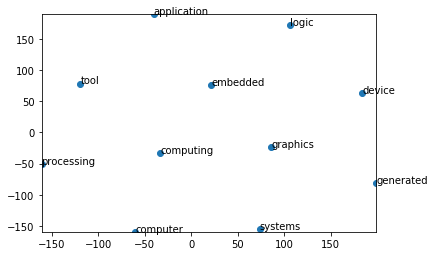

In [64]:
display_closestwords_tsnescatterplot(model, 'computer')

In [47]:
model.wv.most_similar(positive=["indonesia"])

2019-03-24 16:43:29,983: INFO: precomputing L2-norms of word weight vectors


[('tribunnews', 0.6197527647018433),
 ('Indonesia', 0.5842865705490112),
 ('malaysia', 0.5645416378974915),
 ('kompasiana', 0.5604957342147827),
 ('kapanlagi', 0.5527626276016235),
 ('okezone', 0.5519705414772034),
 ('nusantara', 0.5475022792816162),
 ('read', 0.5474493503570557),
 ('jakarta', 0.5463390350341797),
 ('blogspot', 0.538077712059021)]

In [44]:
model.wv.similarity('harimau', 'harimau')

0.9999999999999999

In [19]:
'shower' in model.wv.vocab

True